In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import utils

from strategies import QuantitativeMomentum, EasyRebalance, InverseVolatility, GlobalMinimumVariance, MeanVariance

# Download data

In [21]:
STARTING_CAPITAL = 10_000
STARTING_DAY = '2018-01-01'

ftsemib_index = yf.download(tickers='FTSEMIB.MI')["Adj Close"].loc["2018-01-01":]
benchmark = (ftsemib_index / ftsemib_index.iloc[0]) * STARTING_CAPITAL

ftsemib_tickers = pd.read_excel("FTSEMIB_tickers.xlsx").sort_values(by='ticker', ignore_index=True)
ftsemib_tickers.set_index('ticker', inplace=True)
ftsemib_data = yf.download(list(ftsemib_tickers.index)).loc['2015':]

# Select only stocks available on the market in 2015-01-01
ftsemib_data.dropna(axis=1, inplace=True)
stocks = ftsemib_data['Adj Close'].columns
ftsemib_tickers = ftsemib_tickers.loc[stocks]

display(ftsemib_tickers.head())
display(ftsemib_data.head())

C:\Users\lucat\anaconda3\envs\DEEP_LEARNING\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\lucat\anaconda3\envs\DEEP_LEARNING\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]C:\Users\lucat\anaconda3\envs\DEEP_LEARNING\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[**           

,name,sector
Ticker,,
A2A.MI,A2a,public_services
AMP.MI,Amplifon,health
AZM.MI,Azimut,financial_services
BAMI.MI,Banco Bpm,bank
BC.MI,Brunello Cucinelli,consumer_market


Price      Adj Close                                                     \
Ticker        A2A.MI    AMP.MI    AZM.MI   BAMI.MI      BC.MI   BMED.MI   
Date                                                                      
2015-01-02  0.555044  4.643565  9.785804  5.883239  17.045467  3.190593   
2015-01-05  0.536775  4.762024  9.673996  5.629060  16.818827  3.107256   
2015-01-06  0.528803  4.762024  9.477001  5.363458  16.138899  3.089399   
2015-01-07  0.525813  4.889958  9.487650  5.343466  16.526079  3.056659   
2015-01-08  0.549397  4.628403  9.673996  5.617637  16.544964  3.139995   

Price                                                  ...    Volume  \
Ticker          BMPS.MI    BPE.MI   BPSO.MI    CPR.MI  ...    REC.MI   
Date                                                   ...             
2015-01-02  4081.854248  3.042588  2.453521  2.341414  ...  122006.0   
2015-01-05  4091.181152  2.892640  2.393717  2.288042  ...  117609.0   
2015-01-06  3932.621338  2.783586  2.333914  2.341414  ...  142207.0   
2015-01-07  3926.686035  2.720880  2.343356  2.364619  ...  141764.0   
2015-01-08  4413.388184  2.857197  2.392144  2.462081  ...   81230.0   

Price                                                                \
Ticker         SPM.MI      SRG.MI    STLAM.MI   STMMI.MI     TEN.MI   
Date                                                                  
2015-01-02  1144463.0   4136839.0  13508445.0  3380950.0  2766443.0   
2015-01-05  1789316.0   9641806.0  24539827.0  5361314.0  3354827.0   
2015-01-06  1664682.0   7480702.0  25023024.0  4413967.0  3211719.0   
2015-01-07  1847838.0  12454443.0  32239808.0  5906657.0  3738913.0   
2015-01-08  1736297.0  12890097.0  26414467.0  5712126.0  2601102.0   

Price                                                       
Ticker           TIT.MI      TRN.MI      UCG.MI     UNI.MI  
Date                                                        
2015-01-02   50839798.0   6879391.0   9840669.0   364810.0  
2015-01-05  109584697.0  10562104.0  17285858.0   793216.0  
2015-01-06   78555576.0   9815862.0  16502886.0  1283773.0  
2015-01-07   79695850.0  11865547.0  19171017.0  1455759.0  
2015-01-08  118397153.0  10184746.0  19968387.0  1794449.0  

[5 rows x 198 columns]

# Easy Rebalance Strategy

100%|██████████| 1606/1606 [00:02<00:00, 740.70it/s]


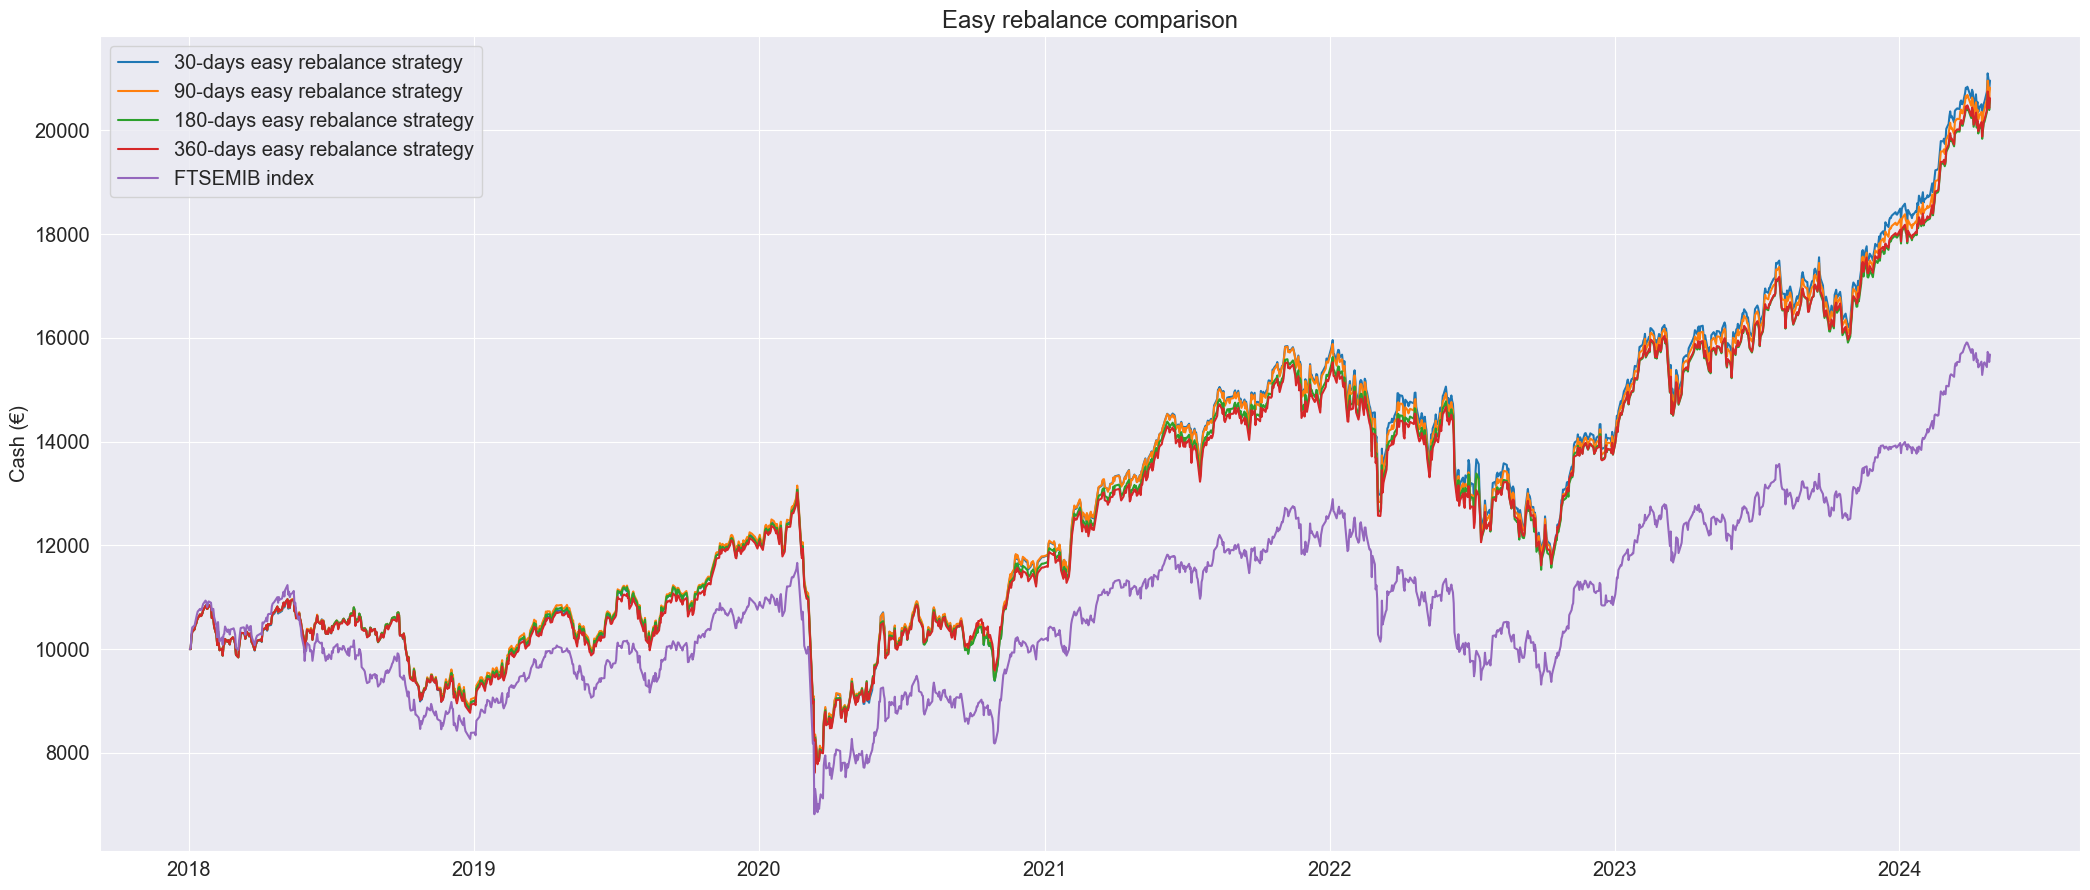

In [22]:
rebalance_frequancies = [30, 90, 180, 360]
stocks = list(ftsemib_tickers.index)
er_strategies = dict()

for reb_freq in rebalance_frequancies:
    strategy = EasyRebalance()
    strategy.strategy_simulation(ftsemib_data, stocks, STARTING_DAY, STARTING_CAPITAL, reb_freq)
    er_strategies[reb_freq] = strategy
    
fig1, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

for reb_freq in rebalance_frequancies:
    strategy_performance = (er_strategies[reb_freq].history['strategy cumulative returns'] +
                            er_strategies[reb_freq].history['available money'])
    ax.plot(strategy_performance, label=f'{reb_freq}-days easy rebalance strategy')

ax.plot(benchmark, label='FTSEMIB index')

ax.legend(fontsize='x-large')
ax.set_title('Easy rebalance comparison', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.set_ylabel("Cash (€)", fontsize='x-large')

plt.show()

# Quantitative Momentum Strategy

100%|██████████| 1606/1606 [00:06<00:00, 248.53it/s]


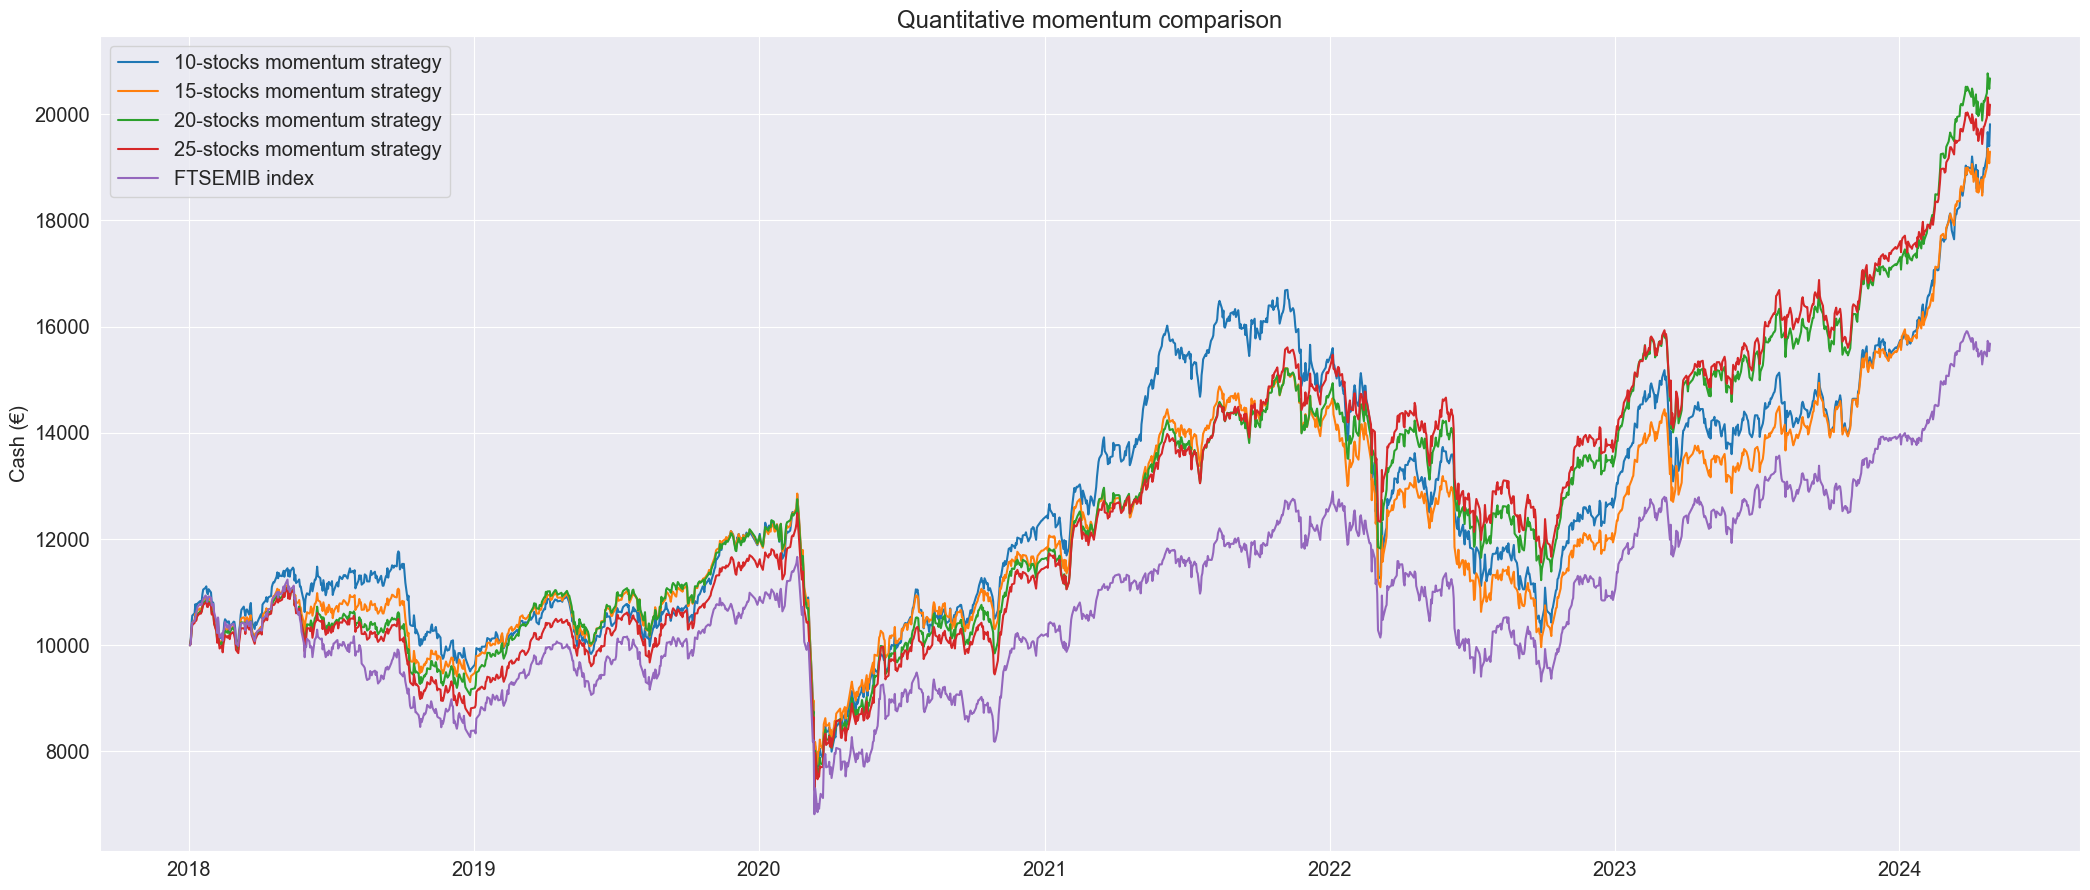

In [23]:
sizes = [10, 15, 20, 25]
qm_strategies = dict()
for size in sizes:
    strategy = QuantitativeMomentum()
    strategy.strategy_simulation(ftsemib_data, STARTING_DAY, size, STARTING_CAPITAL)
    qm_strategies[size] = strategy
    
fig2, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

for size in sizes:
    strategy_performance = (qm_strategies[size].history['strategy cumulative returns'] +
                            qm_strategies[size].history['available money'])
    ax.plot(strategy_performance, label=f'{size}-stocks momentum strategy')

ax.plot(benchmark, label='FTSEMIB index')

ax.legend(fontsize='x-large')
ax.set_title('Quantitative momentum comparison', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.set_ylabel("Cash (€)", fontsize='x-large')

plt.show()

# Inverse Volatility strategy

100%|██████████| 1606/1606 [00:01<00:00, 925.05it/s]


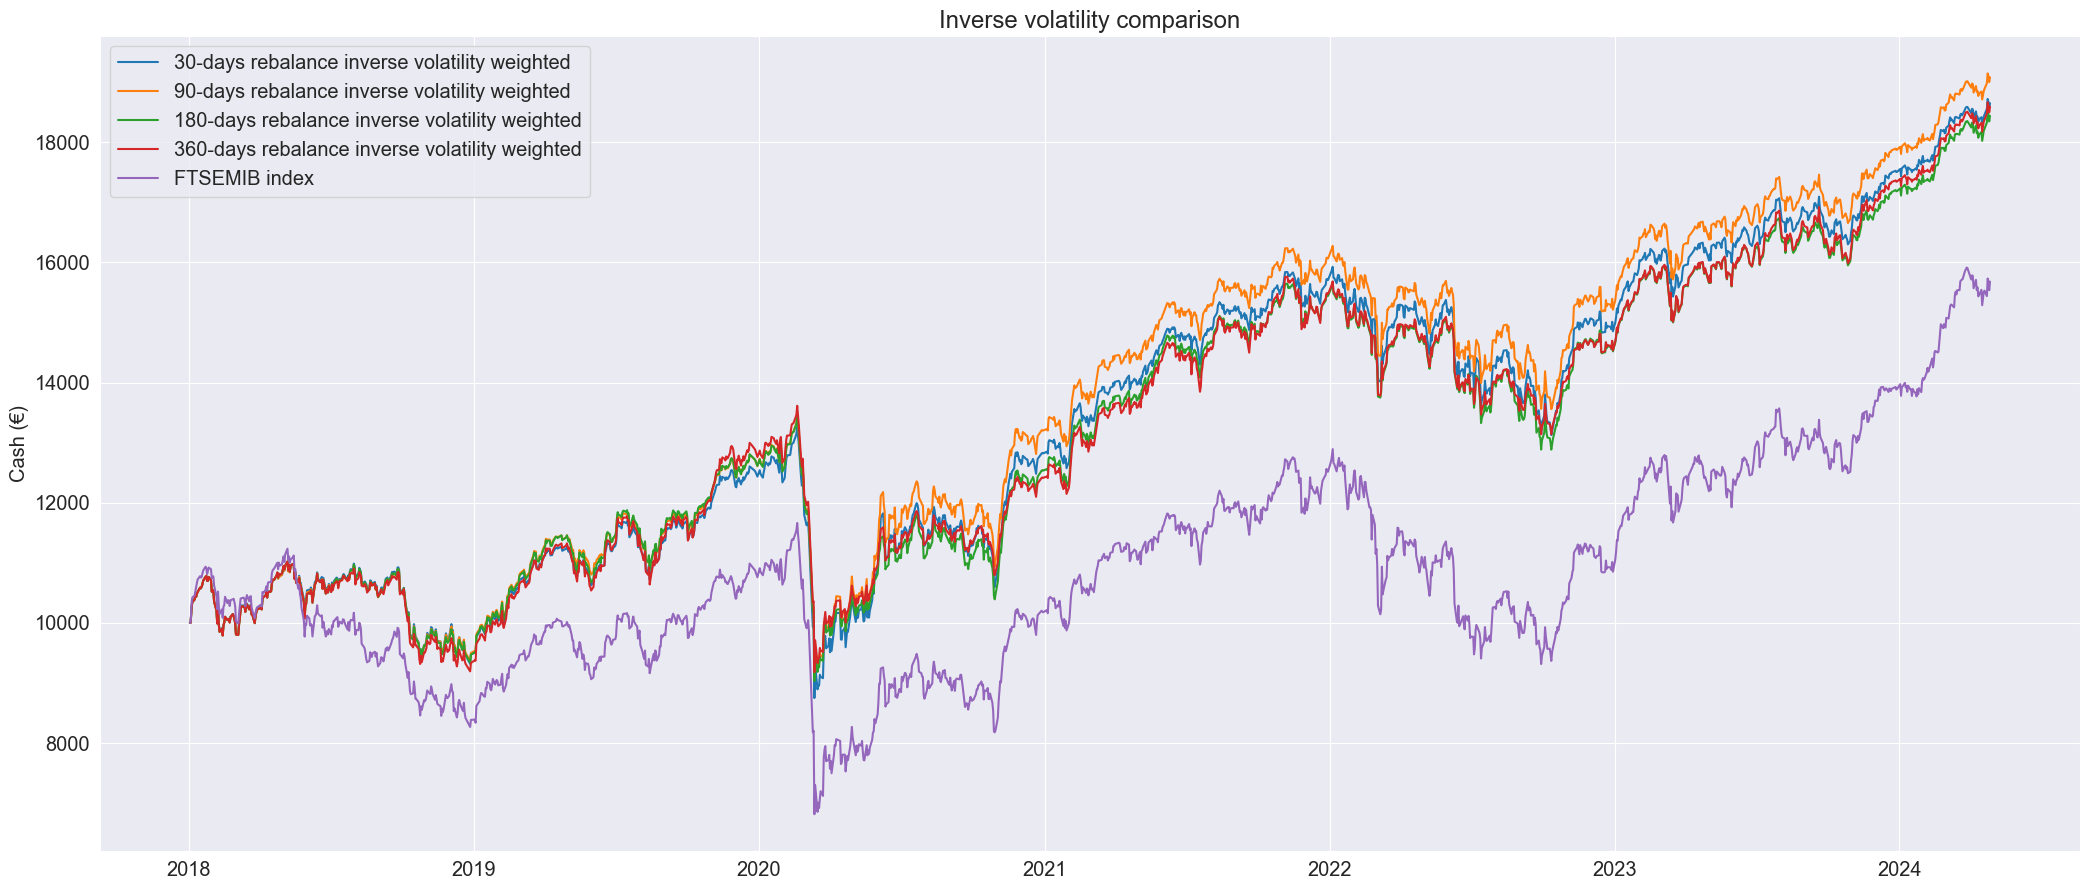

In [24]:
rebalance_frequancies = [30, 90, 180, 360]
inv_vol_strategies = dict()

for reb_freq in rebalance_frequancies:
    strategy = InverseVolatility()
    strategy.strategy_simulation(ftsemib_data, STARTING_DAY, STARTING_CAPITAL, 504, reb_freq)
    inv_vol_strategies[reb_freq] = strategy
    
fig3, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

for reb_freq in rebalance_frequancies:
    strategy_performance = (inv_vol_strategies[reb_freq].history['strategy cumulative returns'] +
                            inv_vol_strategies[reb_freq].history['available money'])
    ax.plot(strategy_performance, label=f'{reb_freq}-days rebalance inverse volatility weighted')

ax.plot(benchmark, label='FTSEMIB index')

ax.legend(fontsize='x-large')
ax.set_title('Inverse volatility comparison', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.set_ylabel("Cash (€)", fontsize='x-large')

plt.show()

# Global Minimum Variance strategy

100%|██████████| 1606/1606 [00:01<00:00, 933.57it/s]


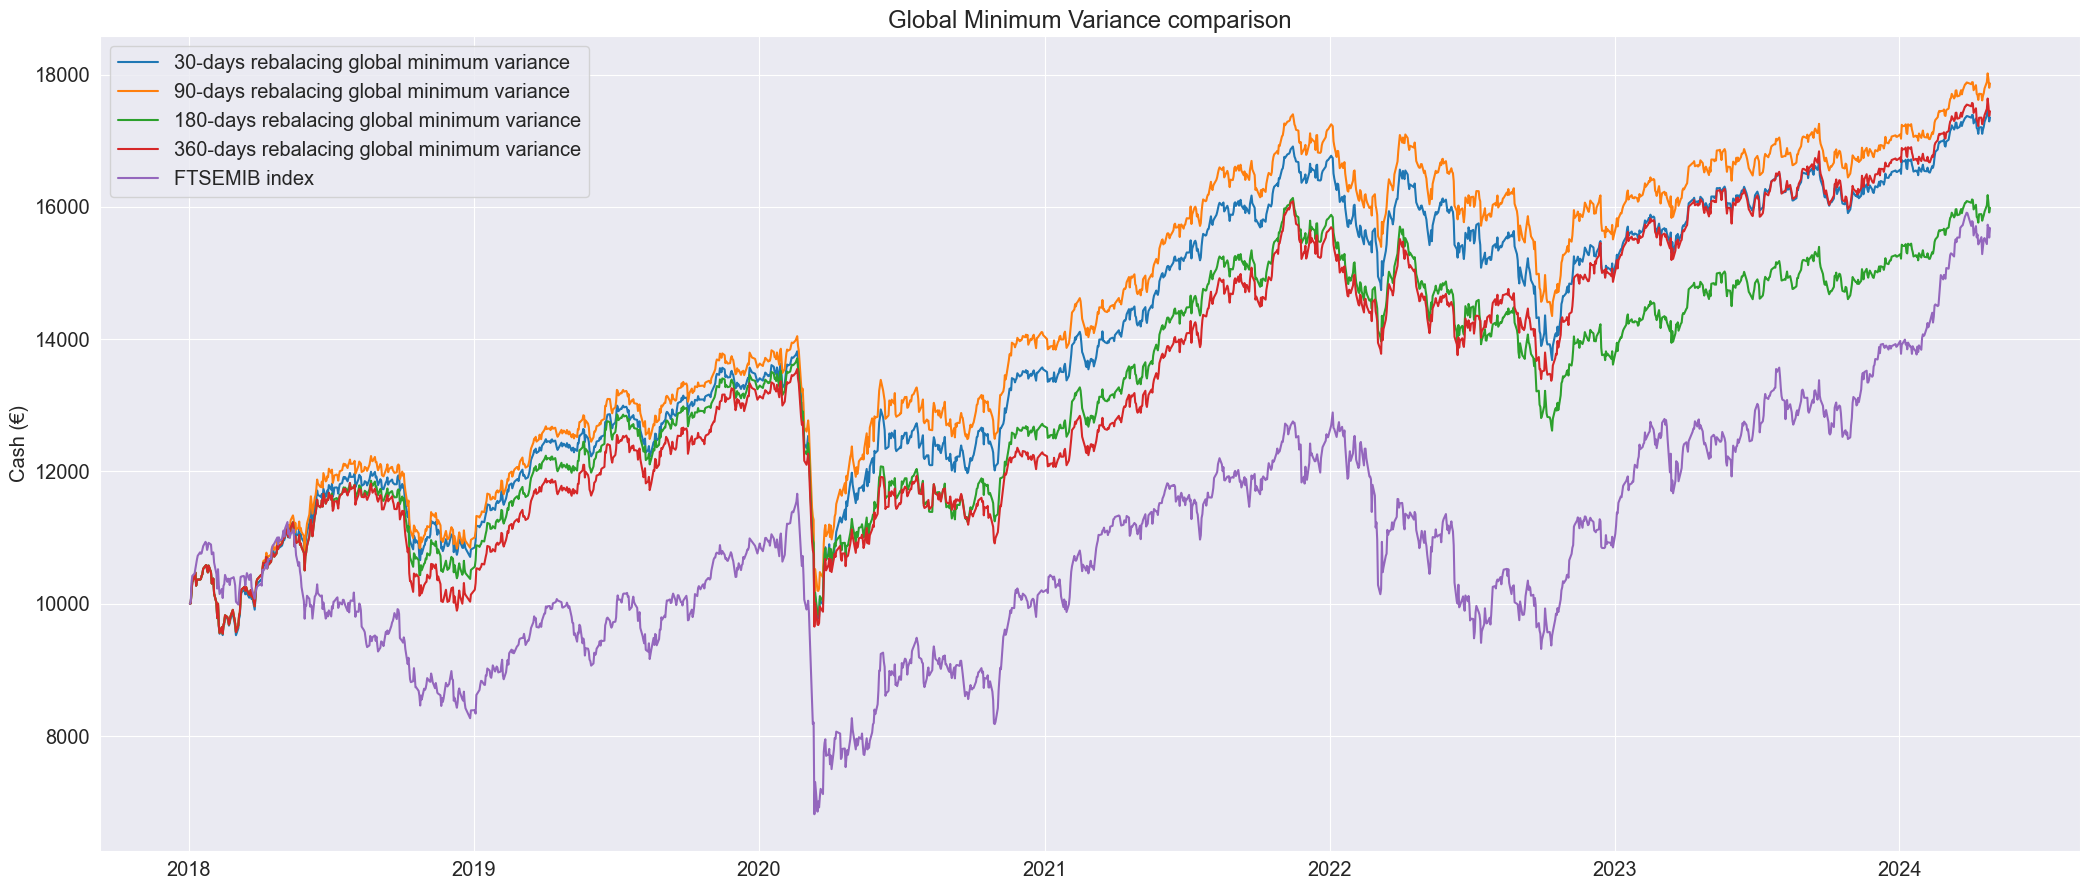

In [25]:
rebalance_frequancies = [30, 90, 180, 360]
minimum_variance_strategies = dict()

for reb_freq in rebalance_frequancies:
    strategy = GlobalMinimumVariance()
    strategy.strategy_simulation(ftsemib_data, STARTING_DAY, STARTING_CAPITAL, 504, reb_freq)
    minimum_variance_strategies[reb_freq] = strategy
    
fig4, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

for reb_freq in rebalance_frequancies:
    strategy_performance = (minimum_variance_strategies[reb_freq].history['strategy cumulative returns'] +
                            minimum_variance_strategies[reb_freq].history['available money'])
    ax.plot(strategy_performance, label=f'{reb_freq}-days rebalacing global minimum variance')

ax.plot(benchmark, label='FTSEMIB index')

ax.legend(fontsize='x-large')
ax.set_title('Global Minimum Variance comparison', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.set_ylabel("Cash (€)", fontsize='x-large')

plt.show()

# Mean-Variance Strategy

100%|██████████| 1606/1606 [00:03<00:00, 402.57it/s]


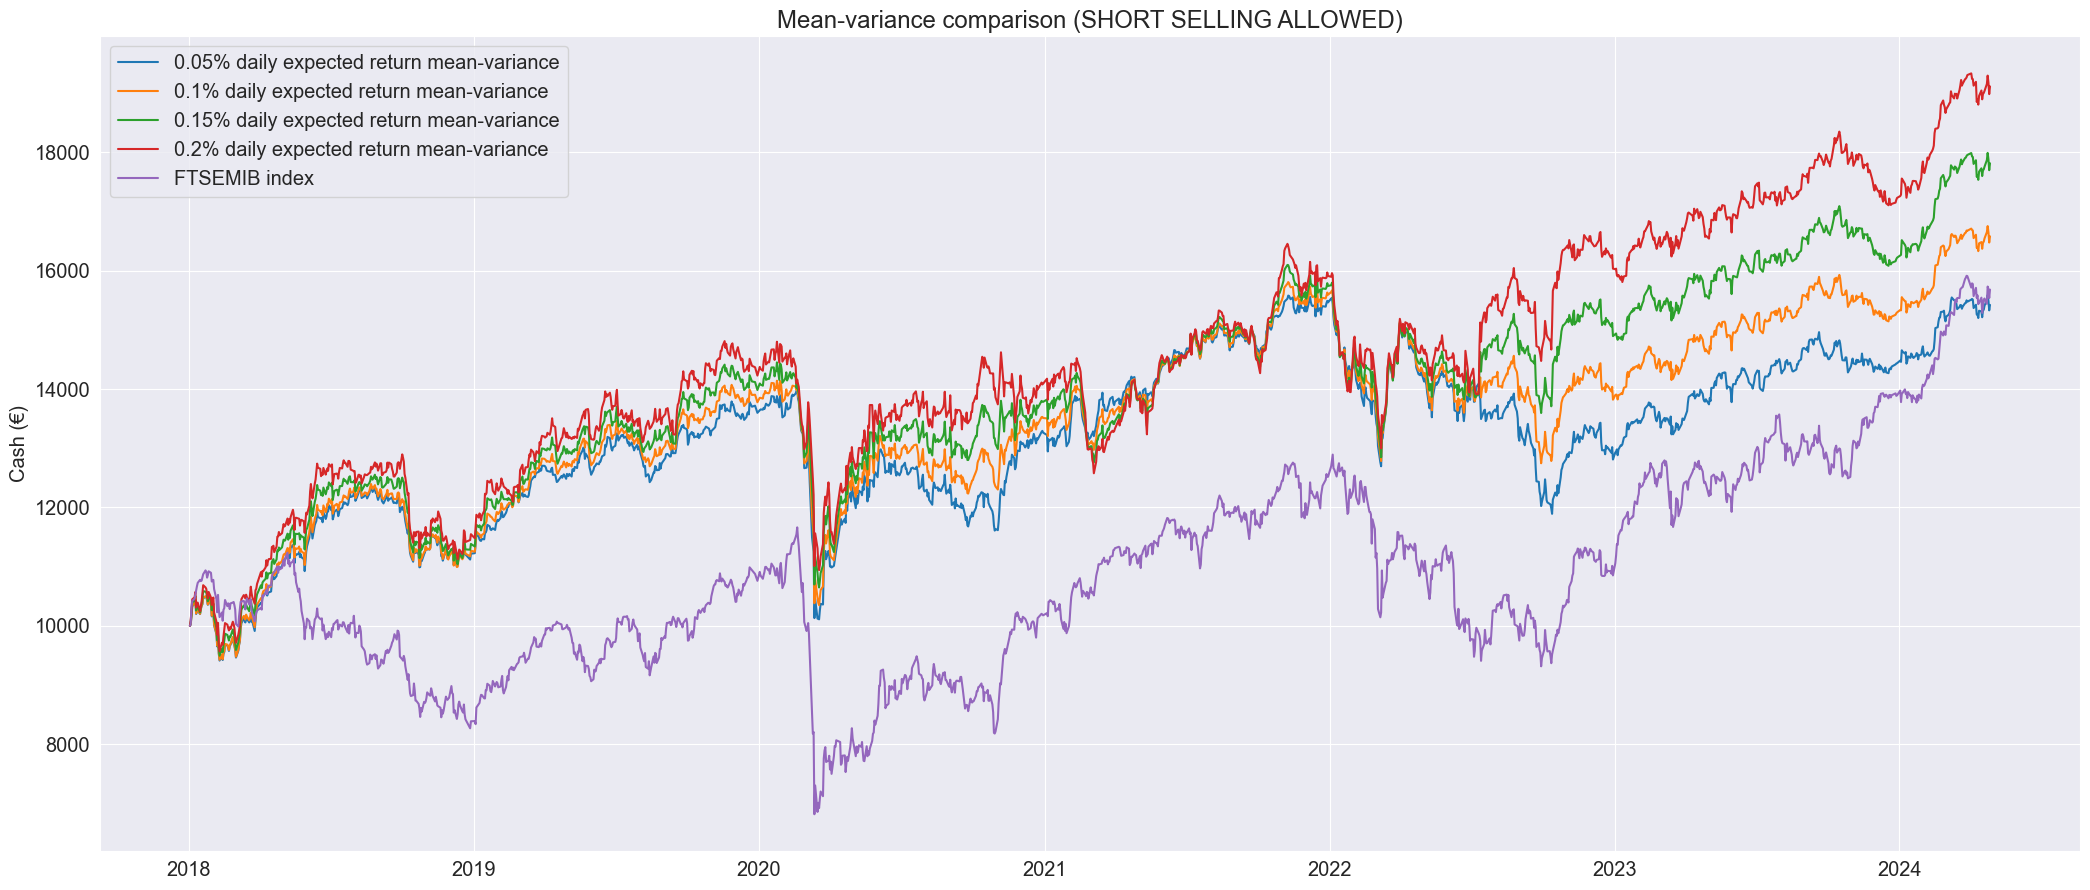

In [26]:
mu_star = [0.0005, 0.0010, 0.0015, 0.002]
mean_variance = dict()

for mu in mu_star:
    strategy = MeanVariance()
    strategy.strategy_simulation(ftsemib_data, STARTING_DAY, STARTING_CAPITAL, mu)
    mean_variance[mu] = strategy
    
fig5, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

for mu in mu_star:
    strategy_performance = (mean_variance[mu].history['strategy cumulative returns'] +
                            mean_variance[mu].history['available money'])
    ax.plot(strategy_performance, label=f'{mu*100}% daily expected return mean-variance')

ax.plot(benchmark, label='FTSEMIB index')

ax.legend(fontsize='x-large')
ax.set_title('Mean-variance comparison (SHORT SELLING ALLOWED)', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.set_ylabel("Cash (€)", fontsize='x-large')

plt.show()

# Easy Rebalance VS Momentum VS Inverse Volatility

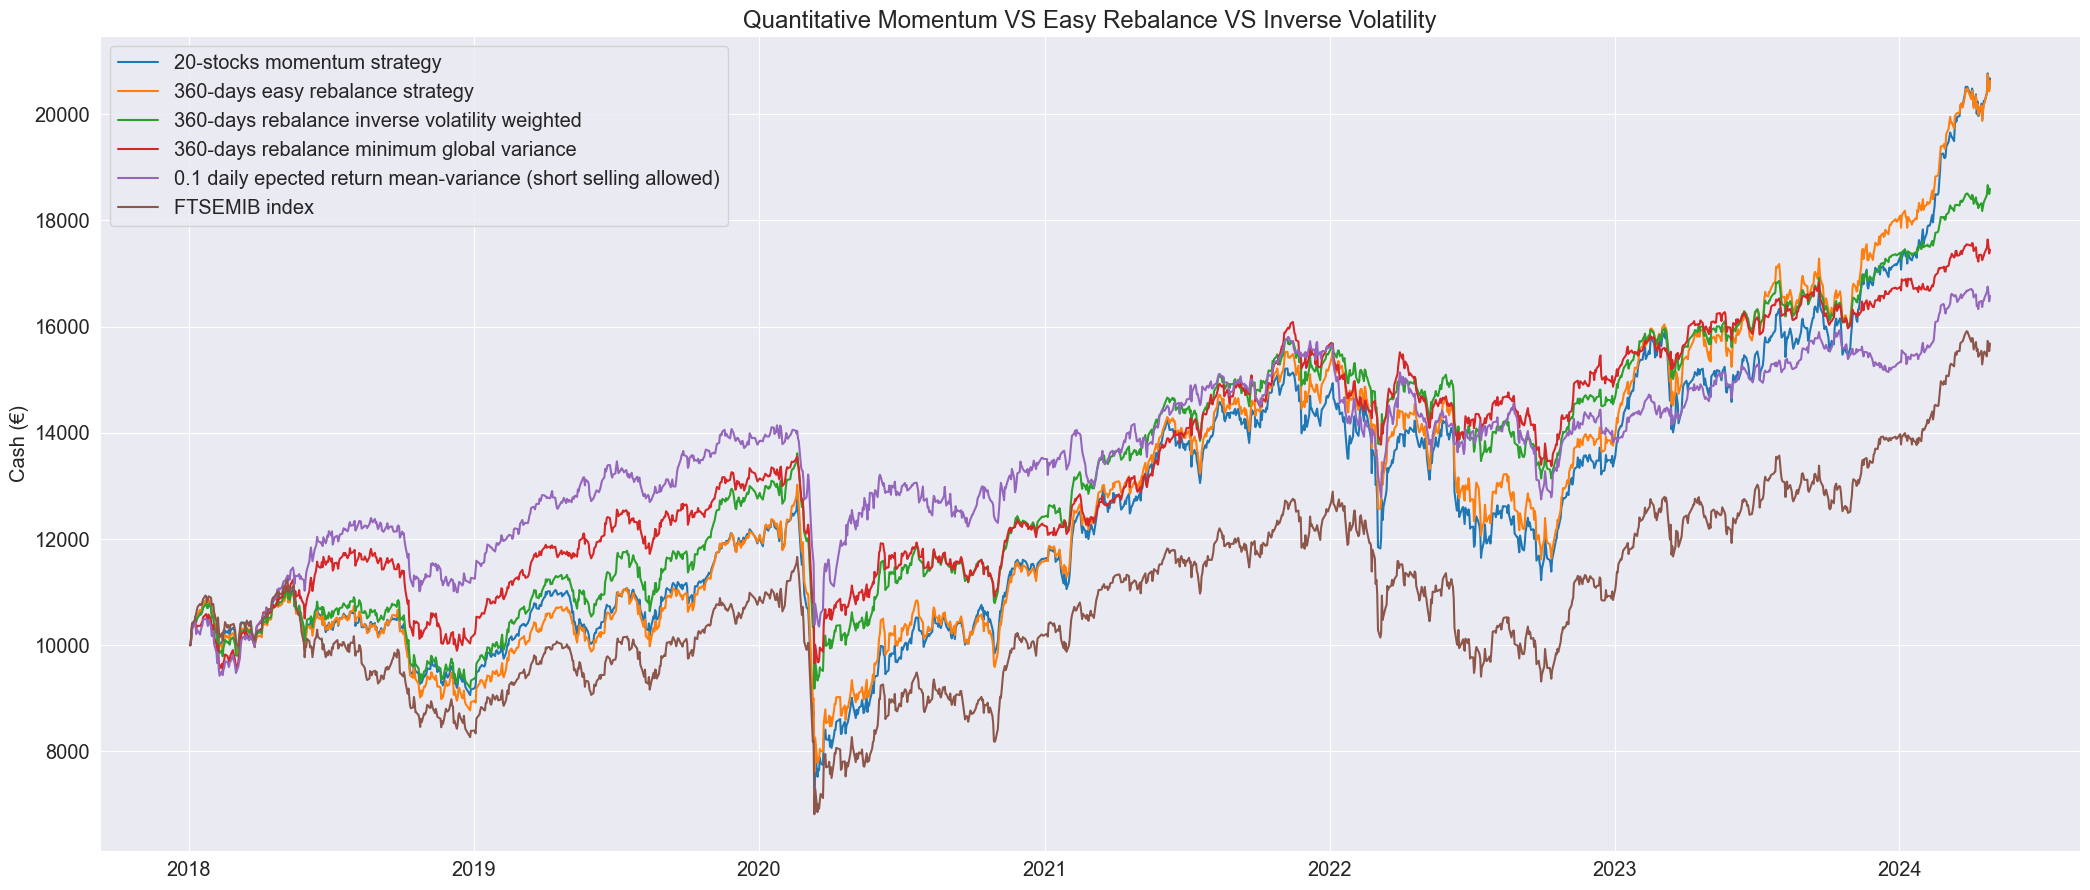

In [27]:
fig10, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

momentum_stocks = 20
rebalance_frequency = 360
mu = 0.001

qm_performance = (qm_strategies[momentum_stocks].history['strategy cumulative returns'] +
                        qm_strategies[momentum_stocks].history['available money'])

er_performance = (er_strategies[rebalance_frequency].history['strategy cumulative returns'] +
                        er_strategies[rebalance_frequency].history['available money'])

inv_vol_performance = (inv_vol_strategies[rebalance_frequency].history['strategy cumulative returns'] +
                        inv_vol_strategies[rebalance_frequency].history['available money'])

minimum_variance_performance = (minimum_variance_strategies[rebalance_frequency].history['strategy cumulative returns'] +
                        minimum_variance_strategies[rebalance_frequency].history['available money'])

mean_variance_performance = (mean_variance[mu].history['strategy cumulative returns'] +
                        mean_variance[mu].history['available money'])

ax.plot(qm_performance, label=f'{momentum_stocks}-stocks momentum strategy')
ax.plot(er_performance, label=f'{rebalance_frequency}-days easy rebalance strategy')
ax.plot(inv_vol_performance, label=f'{rebalance_frequency}-days rebalance inverse volatility weighted')
ax.plot(minimum_variance_performance, label=f'{rebalance_frequency}-days rebalance minimum global variance')
ax.plot(mean_variance_performance, label=f'{mu*100} daily epected return mean-variance (short selling allowed)')

ax.plot(benchmark, label='FTSEMIB index')

ax.legend(fontsize='x-large')
ax.set_title('Quantitative Momentum VS Easy Rebalance VS Inverse Volatility', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.set_ylabel("Cash (€)", fontsize='x-large')

plt.show()